In [1]:
# Data understanding and exploration
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import statsmodels.api as sm

In [6]:
hrdata=pd.read_csv("F:\CMLP\HR_data.csv")

In [7]:
hrdata.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [9]:
hrdata.shape

(14999, 10)

In [10]:
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [13]:
hrdata.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [14]:
hrdata.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [15]:
# data modifying
hrdata=hrdata.rename(columns={'average_montly_hours':'average_monthly_hours'})

In [16]:
hrdata.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [17]:
hrdata.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [18]:
hrdata['department']=np.where(hrdata['department'] =='support', 'technical', hrdata['department']) 
hrdata['department']=np.where(hrdata['department'] =='IT', 'technical', hrdata['department'])

In [20]:
hrdata['department'].value_counts()

technical      6176
sales          4140
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

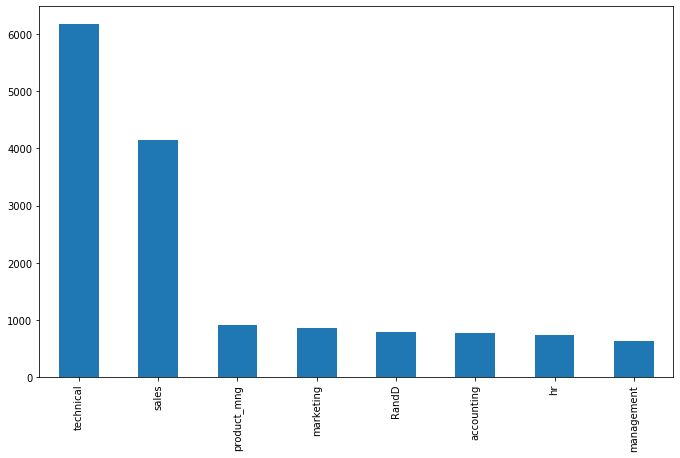

In [23]:
# Visualizing the data
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
hrdata['department'].value_counts().plot('bar') 

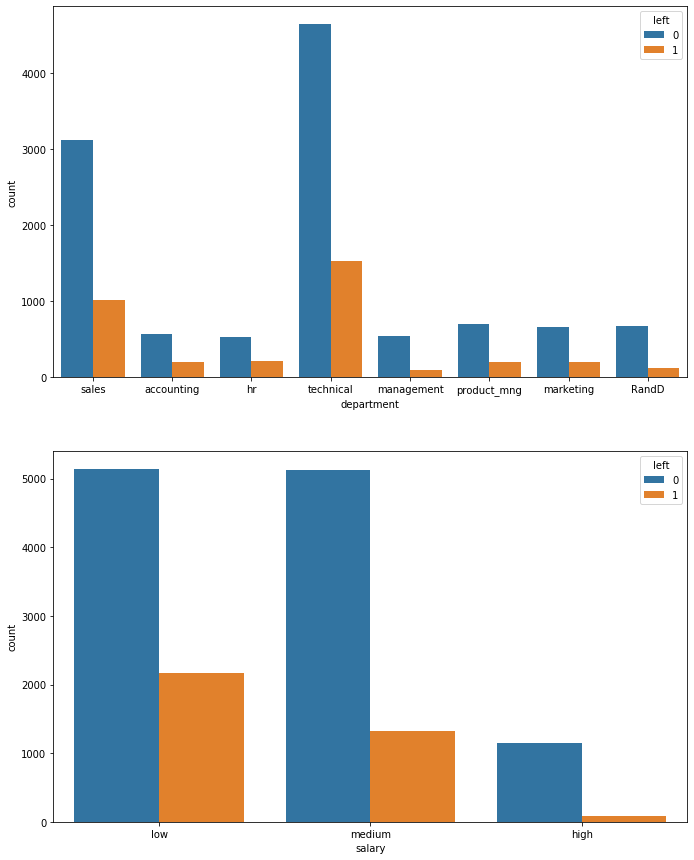

In [25]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
hrdata.groupby(['department'])['left'].value_counts()
sns.countplot(x = 'department', hue = 'left', data = hrdata)
plt.subplot(2,2,3)
sns.countplot(x = 'salary', hue='left', data = hrdata)

In [30]:
left=hrdata.groupby('left').mean()
left

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_monthly_hours  time_spend_company  Work_accident  \
left                                                             
0                199.060203            3.380032       0.175009   
1                207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

In [31]:
dep=hrdata.groupby('department').mean()
dep

satisfaction_level  last_evaluation  number_project  \
department                                                         
RandD                  0.619822         0.712122        3.853875   
accounting             0.582151         0.717718        3.825293   
hr                     0.598809         0.708850        3.654939   
management             0.621349         0.724000        3.860317   
marketing              0.618601         0.715886        3.687646   
product_mng            0.619634         0.714756        3.807095   
sales                  0.614447         0.709717        3.776329   
technical              0.613687         0.720976        3.839054   

             average_monthly_hours  time_spend_company  Work_accident  \
department                                                              
RandD                   200.800508            3.367217       0.170267   
accounting              201.162973            3.522816       0.125163   
hr                      198.684709            3.355886       0.120433   
management              201.249206            4.303175       0.163492   
marketing               199.385781            3.569930       0.160839   
product_mng             199.965632            3.475610       0.146341   
sales                   200.911353            3.534058       0.141787   
technical               201.813795            3.416127       0.144106   

                 left  promotion_last_5years  
department                                    
RandD        0.153748               0.034307  
accounting   0.265971               0.018253  
hr           0.290934               0.020298  
management   0.144444               0.109524  
marketing    0.236597               0.050117  
product_mng  0.219512               0.000000  
sales        0.244928               0.024155  
technical    0.246924               0.008258

In [32]:
sal=hrdata.groupby('salary').mean()
sal

satisfaction_level  last_evaluation  number_project  \
salary                                                        
high              0.637470         0.704325        3.767179   
low               0.600753         0.717017        3.799891   
medium            0.621817         0.717322        3.813528   

        average_monthly_hours  time_spend_company  Work_accident      left  \
salary                                                                       
high               199.867421            3.692805       0.155214  0.066289   
low                200.996583            3.438218       0.142154  0.296884   
medium             201.338349            3.529010       0.145361  0.204313   

        promotion_last_5years  
salary                         
high                 0.058205  
low                  0.009021  
medium               0.028079

Text(0, 0.5, 'Frequency')

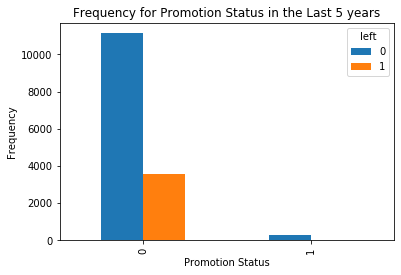

In [33]:
pd.crosstab(hrdata['promotion_last_5years'],hrdata['left']).plot(kind='bar')
plt.title('Frequency for Promotion Status in the Last 5 years')
plt.xlabel('Promotion Status')
plt.ylabel('Frequency')

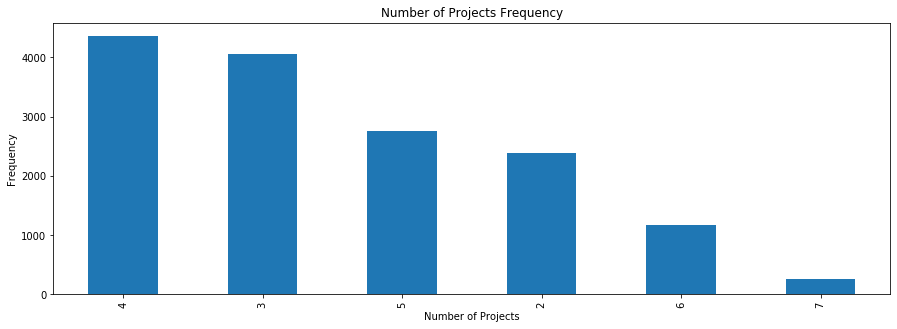

In [37]:
plt.figure(figsize=(15,5))
plt.title('Number of Projects Frequency')
plt.xlabel('Number of Projects')
plt.ylabel('Frequency')
hrdata['number_project'].value_counts().plot(kind='bar')

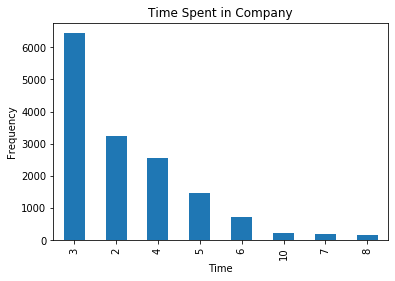

In [41]:
plt.title('Time Spent in Company')
plt.xlabel('Time')
plt.ylabel('Frequency')
hrdata['time_spend_company'].value_counts().plot(kind='bar')

In [50]:
y=hrdata['left']
hr=hrdata.drop(['department','left','salary'],axis=1)
hr.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  promotion_last_5years  
0                   3              0                      0  
1                   6              0                      0  
2                   4              0                      0  
3                   5              0                      0  
4                   3              0                      0

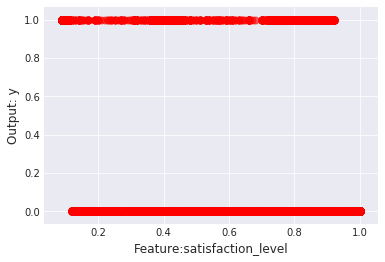

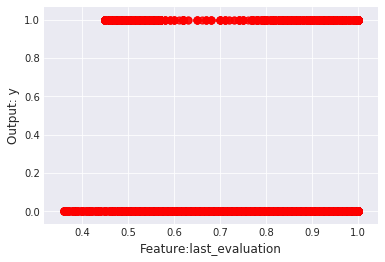

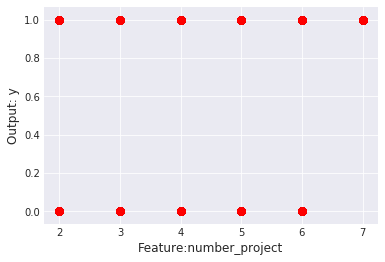

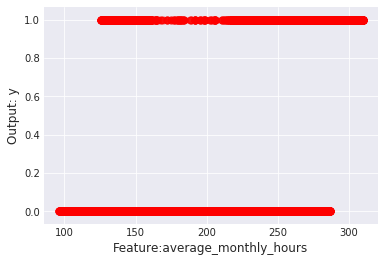

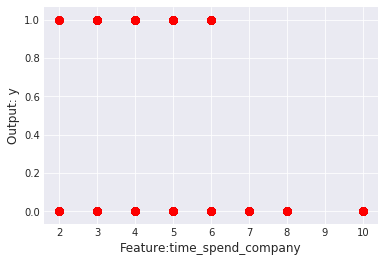

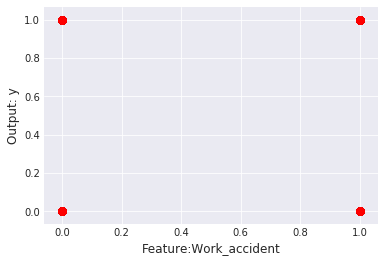

In [52]:
#visualizing correlation
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(hr.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.scatter(hr[col],y,c='red',s=50,alpha=0.6)

In [44]:
corr=hrdata.corr().loc['left']
corr

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_monthly_hours    0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
Name: left, dtype: float64

In [69]:
# Logistic regressor model building 
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [70]:
x=hrdata.drop(['left'],axis=1)

In [71]:
x.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  promotion_last_5years department  salary  
0                   3              0                      0      sales     low  
1                   6              0                      0      sales  medium  
2                   4              0                      0      sales  medium  
3                   5              0                      0      sales     low  
4                   3              0                      0      sales     low

In [75]:
X=x.apply(lr.fit_transform)
X

satisfaction_level  last_evaluation  number_project  \
0                      29               17               0   
1                      71               50               3   
2                       2               52               5   
3                      63               51               3   
4                      28               16               0   
5                      32               14               0   
6                       1               41               4   
7                      83               49               3   
8                      80               64               3   
9                      33               17               0   
10                     36               18               0   
11                      2               45               4   
12                     75               56               2   
13                     32               19               0   
14                     27               20               0   
15                     29               18               0   
16                     36               11               0   
17                     69               63               2   
18                     36               15               0   
19                     67               53               3   
20                      2               47               4   
21                     29               19               0   
22                      0               59               4   
23                     37               21               0   
24                     31               17               0   
25                     80               56               3   
26                     73               51               2   
27                     31               13               0   
28                     32               10               0   
29                     29               14               0   
...                   ...              ...             ...   
14969                  34               10               0   
14970                  69               57               2   
14971                  30                9               0   
14972                   2               61               4   
14973                  27               16               0   
14974                  27               18               0   
14975                   1               43               5   
14976                  31               11               0   
14977                  72               49               2   
14978                  31               11               0   
14979                   0               57               4   
14980                  67               53               3   
14981                  64               57               3   
14982                  29               13               0   
14983                  63               48               3   
14984                  31               20               0   
14985                  82               63               3   
14986                  76               49               2   
14987                  81               34               3   
14988                  37               19               0   
14989                  34               21               0   
14990                  80               52               3   
14991                   0               45               4   
14992                  31               12               0   
14993                  67               47               4   
14994                  31               21               0   
14995                  28               12               0   
14996                  28               17               0   
14997                   2               60               4   
14998                  28               16               0   

       average_monthly_hours  time_spend_company  Work_accident  \
0                         61                   1              0   
1                        166

In [76]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [79]:
# Model testing
from sklearn.linear_model import LogisticRegression

In [80]:
log=LogisticRegression(random_state=0)

In [81]:
log.fit(x_train,y_train)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
log.coef_

array([[-0.04101901,  0.0072625 , -0.31095967,  0.00445364,  0.27184513,
        -1.43439879, -1.54738373,  0.05145281,  0.0022597 ]])

In [84]:
ypred=log.predict(x_test)

In [85]:
#validation
from sklearn.metrics import confusion_matrix

In [87]:
cm=confusion_matrix(y_test,ypred)
cm

array([[2641,  240],
       [ 648,  221]], dtype=int64)

In [88]:
report = pd.DataFrame([ypred, y_test]).T
report.columns = ["Prediction", "Actual"]
report.head()

Prediction  Actual
0           0       1
1           0       0
2           0       0
3           0       0
4           0       0

In [89]:
report.match=(report.Prediction==report.Actual)
report.match

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0       False
1        True
2        True
3        True
4        True
5        True
6       False
7        True
8        True
9       False
10       True
11       True
12       True
13      False
14      False
15       True
16      False
17       True
18       True
19       True
20       True
21      False
22       True
23      False
24       True
25      False
26       True
27       True
28       True
29       True
        ...  
3720    False
3721     True
3722     True
3723     True
3724    False
3725     True
3726     True
3727     True
3728     True
3729    False
3730    False
3731     True
3732    False
3733     True
3734     True
3735     True
3736     True
3737    False
3738     True
3739     True
3740     True
3741     True
3742     True
3743     True
3744     True
3745     True
3746     True
3747    False
3748     True
3749     True
Length: 3750, dtype: bool

In [91]:
m_rate = 100 - report.match.sum()/report.shape[0]*100
m_rate

23.680000000000007

In [92]:
report

Prediction  Actual
0              0       1
1              0       0
2              0       0
3              0       0
4              0       0
5              0       0
6              1       0
7              0       0
8              0       0
9              0       1
10             0       0
11             0       0
12             1       1
13             0       1
14             1       0
15             0       0
16             0       1
17             0       0
18             0       0
19             0       0
20             0       0
21             1       0
22             0       0
23             0       1
24             0       0
25             0       1
26             0       0
27             0       0
28             0       0
29             0       0
...          ...     ...
3720           0       1
3721           0       0
3722           0       0
3723           0       0
3724           0       1
3725           0       0
3726           0       0
3727           0       0
3728           0       0
3729           1       0
3730           0       1
3731           0       0
3732           0       1
3733           0       0
3734           0       0
3735           0       0
3736           0       0
3737           0       1
3738           0       0
3739           0       0
3740           0       0
3741           0       0
3742           0       0
3743           1       1
3744           0       0
3745           0       0
3746           0       0
3747           0       1
3748           0       0
3749           0       0

[3750 rows x 2 columns]

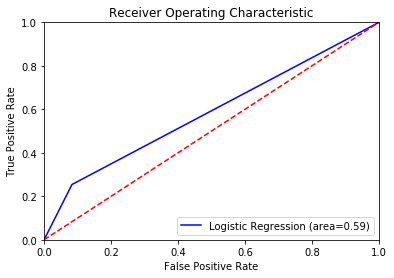

In [94]:
#roc curve_1
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,ypred)
roc_auc=roc_auc_score(y_test,ypred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='Logistic Regression (area=%0.2f)'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [102]:
#Random forest 
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
y_pred_rf=rf.predict(x_test)

In [106]:
report_2 = pd.DataFrame([y_pred_rf, y_test]).T
report_2.columns = ["Prediction", "Actual"]
report_2.head()

Prediction  Actual
0           1       1
1           0       0
2           0       0
3           0       0
4           0       0

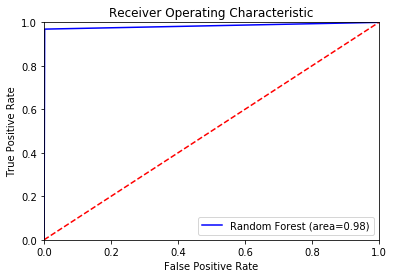

In [110]:
#roc curve_2
from sklearn.metrics import roc_curve, roc_auc_score
fpr_rf,tpr_rf,threshold_rf=roc_curve(y_test,y_pred_rf)
roc_auc_rf=roc_auc_score(y_test,y_pred_rf)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf,tpr_rf,'b',label='Random Forest (area=%0.2f)'%roc_auc_rf)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()